<a href="https://colab.research.google.com/github/Namia663/heart-disease-prediction/blob/main/01_data_preprocessing_heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [ ]:
# Load dataset
#modules we'll use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline

# read in all our data
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Missing Value

In [ ]:
# mengecek nilai yang hilang
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Tidak ditemukan missing value.

## Duplicate value

In [ ]:
# Menemukan Duplikat data berdasarkan semua kolom
df.duplicated().values.any()

True

In [ ]:
df.duplicated().sum()

723

In [ ]:
# Menemukan duplikat data untuk tiap baris data
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [ ]:
# Menampilkan baris data yang duplikat
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
# Mengatasi duplikat dengan menghapus baris duplikat
data_cleaned = df.drop_duplicates()

# Menampilkan dataset setelah mengatasi duplikat
data_cleaned

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [ ]:
# Menemukan Duplikat data berdasarkan semua kolom
data_cleaned.duplicated().values.any()

False

Data duplicate sudah berhasil diatasi.

## Outlier

In [ ]:
df2 = data_cleaned.copy()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


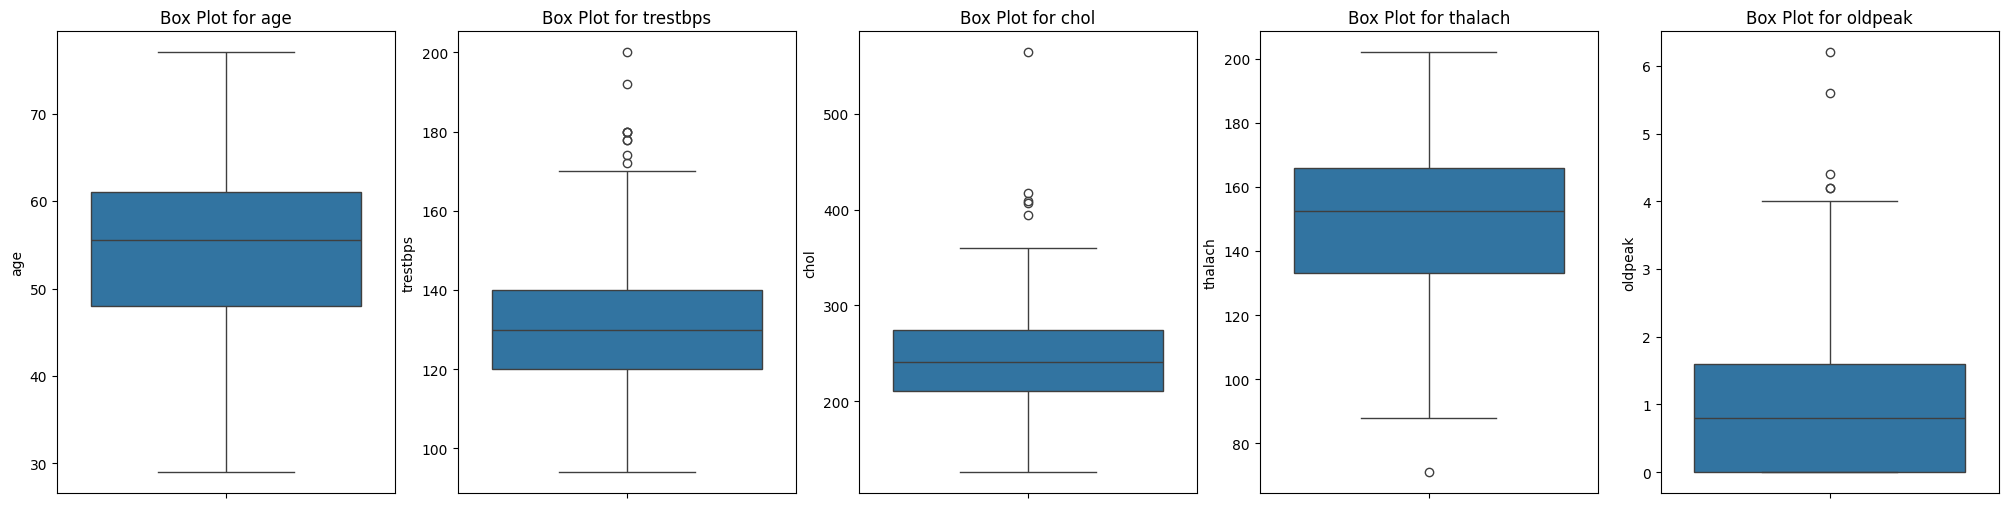

In [ ]:
# Membuat diagram kotak (box plot) untuk setiap kolom numerik
# Filter Kolom dengan Tipe Data Numerik
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Membuat Plot untuk Setiap Kolom Numerik:
fig, axs = plt.subplots(ncols=len(numeric_columns), figsize=(20, 5))

for i, column in enumerate(numeric_columns):
    sns.boxplot(y=column, data=df2, ax=axs[i], whis=1.5)  # mengatur panjang whisker (garis yang menghubungkan kotak ke titik-titik di luar kotak) menjadi 1.5 kali IQR

    axs[i].set_title(f'Box Plot for {column}')
    axs[i].set_xlabel('')  # menghapus label sumbu x

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [ ]:
# Menghitung jumlah outlier di setiap kolom numerik
Q1 = df2[numeric_columns].quantile(0.25)
Q3 = df2[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df2[numeric_columns] < (Q1 - 1.5 * IQR)) | (df2[numeric_columns] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

age         0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64

In [ ]:
# mengatasi outliers
def handle_outliers_iqr(df2, column):
    Q1 = df2[column].quantile(0.25)
    Q3 = df2[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menentukan batas bawah dan batas atas
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti nilai outlier dengan nilai batas atas atau batas bawah terdekat
    df2[column] = np.where(df2[column] < lower_bound, lower_bound, np.where(df2[column] > upper_bound, upper_bound, df2[column]))

# Menggunakan fungsi handle_outliers_iqr untuk setiap kolom yang memiliki outlier
columns_with_outliers = numeric_columns
for column in columns_with_outliers:
    handle_outliers_iqr(df2, column)

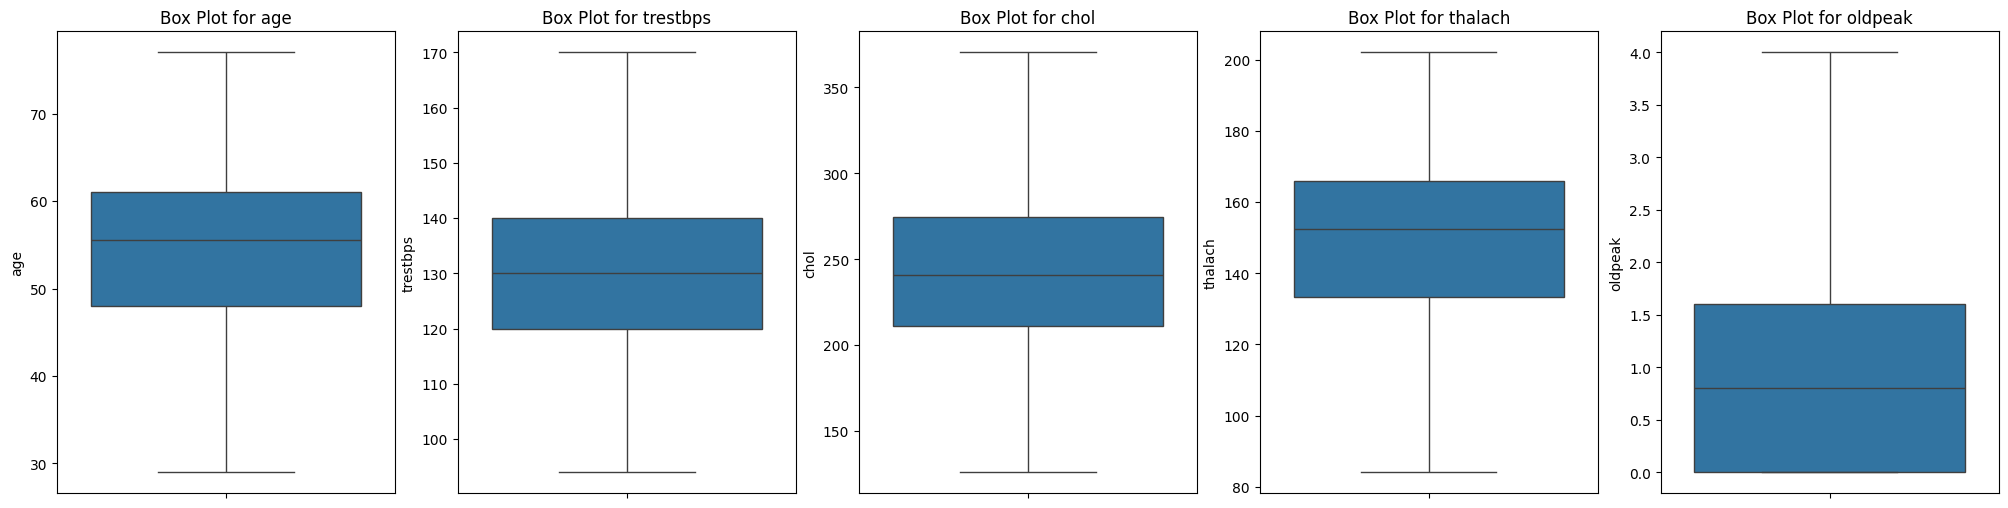

In [ ]:
# Membuat diagram kotak (box plot) untuk setiap kolom numerik
# Filter Kolom dengan Tipe Data Numerik
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Membuat Plot untuk Setiap Kolom Numerik:
fig, axs = plt.subplots(ncols=len(numeric_columns), figsize=(20, 5))

for i, column in enumerate(numeric_columns):
    sns.boxplot(y=column, data=df2, ax=axs[i], whis=1.5)  # mengatur panjang whisker (garis yang menghubungkan kotak ke titik-titik di luar kotak) menjadi 1.5 kali IQR

    axs[i].set_title(f'Box Plot for {column}')
    axs[i].set_xlabel('')  # menghapus label sumbu x

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

Feature dengan outlier sudah berhasil diatasi.

## Imbalance Data

In [ ]:
# Menghitung jumlah nilai unik dan mencetak sebagian dari nilai unik tersebut
unique_values = df2['target'].unique()
print("Jumlah nilai unik:", len(unique_values))
print("Sebagian nilai unik:", unique_values[:10])  # Cetak 10 nilai unik pertama

Jumlah nilai unik: 2
Sebagian nilai unik: [0 1]


In [ ]:
df2.target.value_counts()

1    164
0    138
Name: target, dtype: int64

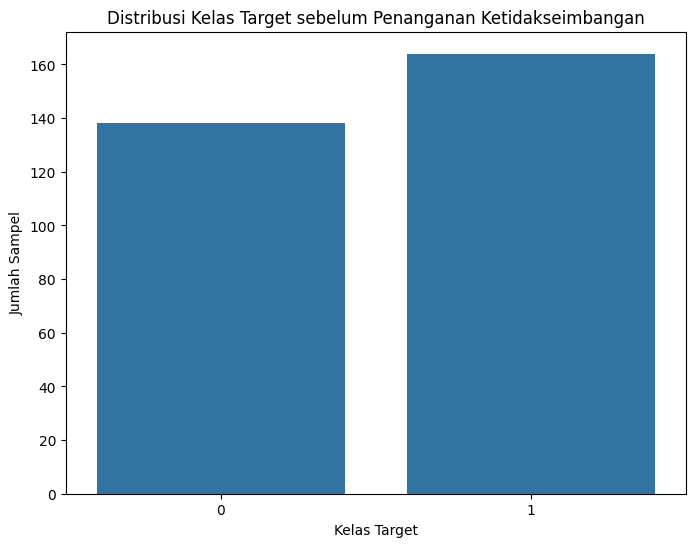

In [ ]:
# Visualisasi distribusi kelas sebelum penanganan imbalance
plt.figure(figsize=(8, 6))
sns.countplot(data=df2, x='target')
plt.title('Distribusi Kelas Target sebelum Penanganan Ketidakseimbangan')
plt.xlabel('Kelas Target')
plt.ylabel('Jumlah Sampel')
plt.show()

In [ ]:
# Mengatasi imbalance data
from imblearn.over_sampling import SMOTE

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Menerapkan SMOTE oversampling
X_resampled, y_resampled = smote.fit_resample(df2.drop(columns=['target']), df2['target'])

# Membuat DataFrame baru dari hasil oversampling
df_resampled = pd.DataFrame(X_resampled, columns=df.columns[:-1])
df_resampled['target'] = y_resampled

# Menampilkan jumlah sampel setelah oversampling
print(df_resampled['target'].value_counts())

0    164
1    164
Name: target, dtype: int64


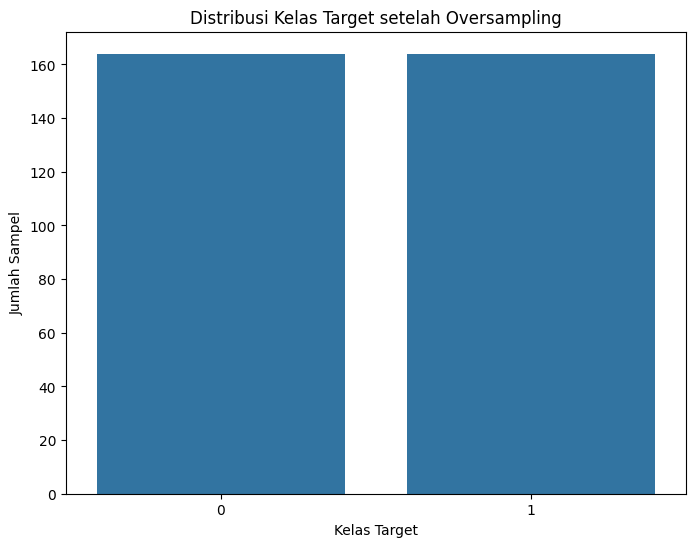

In [ ]:
# Visualisasi distribusi kelas setelah oversampling
plt.figure(figsize=(8, 6))
sns.countplot(data=df_resampled, x='target')
plt.title('Distribusi Kelas Target setelah Oversampling')
plt.xlabel('Kelas Target')
plt.ylabel('Jumlah Sampel')
plt.show()

feature 'target' sudah balance

In [ ]:
df_resampled

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.000000,1,0,125.000000,212.000000,0,1,168.000000,0,1.000000,2,2,3,0
1,53.000000,1,0,140.000000,203.000000,1,0,155.000000,1,3.100000,0,0,3,0
2,70.000000,1,0,145.000000,174.000000,0,1,125.000000,1,2.600000,0,0,3,0
3,61.000000,1,0,148.000000,203.000000,0,1,161.000000,0,0.000000,2,1,3,0
4,62.000000,0,0,138.000000,294.000000,1,1,106.000000,0,1.900000,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,51.367410,1,0,144.097672,201.172065,0,0,126.586033,0,1.007439,1,0,2,0
324,53.841903,1,0,140.000000,297.105398,0,0,172.052699,0,1.473693,1,0,3,0
325,60.760610,1,0,140.000000,181.401525,0,0,154.077255,1,1.760610,2,1,3,0
326,59.122038,1,1,126.488153,216.535541,0,0,133.755924,0,2.224408,1,1,1,0


## Feature Encoding

In [ ]:
df3 = df_resampled.copy()
df3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1,0,125.0,212.0,0,1,168.0,0,1.0,2,2,3,0
1,53.0,1,0,140.0,203.0,1,0,155.0,1,3.1,0,0,3,0
2,70.0,1,0,145.0,174.0,0,1,125.0,1,2.6,0,0,3,0
3,61.0,1,0,148.0,203.0,0,1,161.0,0,0.0,2,1,3,0
4,62.0,0,0,138.0,294.0,1,1,106.0,0,1.9,1,3,2,0


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       328 non-null    float64
 1   sex       328 non-null    int64  
 2   cp        328 non-null    int64  
 3   trestbps  328 non-null    float64
 4   chol      328 non-null    float64
 5   fbs       328 non-null    int64  
 6   restecg   328 non-null    int64  
 7   thalach   328 non-null    float64
 8   exang     328 non-null    int64  
 9   oldpeak   328 non-null    float64
 10  slope     328 non-null    int64  
 11  ca        328 non-null    int64  
 12  thal      328 non-null    int64  
 13  target    328 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 36.0 KB


Feature encoding tidak perlu dilakukan pada datasets ini karena tidak ada variabel dalam dataset tersebut yang memiliki tipe data kategori atau faktor yang perlu diubah menjadi representasi numerik.

Semua variabel dalam dataset tersebut sudah dalam bentuk numerik, yang berarti mereka dapat langsung digunakan dalam analisis atau pemodelan tanpa perlu diubah.

Dengan demikian, proses feature encoding tidak perlu dilakukan karena tidak akan memberikan nilai tambah pada analisis atau pemodelan.

# Exploratory Data Analysis (EDA)

## Mengelaborasi features dan tipe data (nominal, ordinal, numerical)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

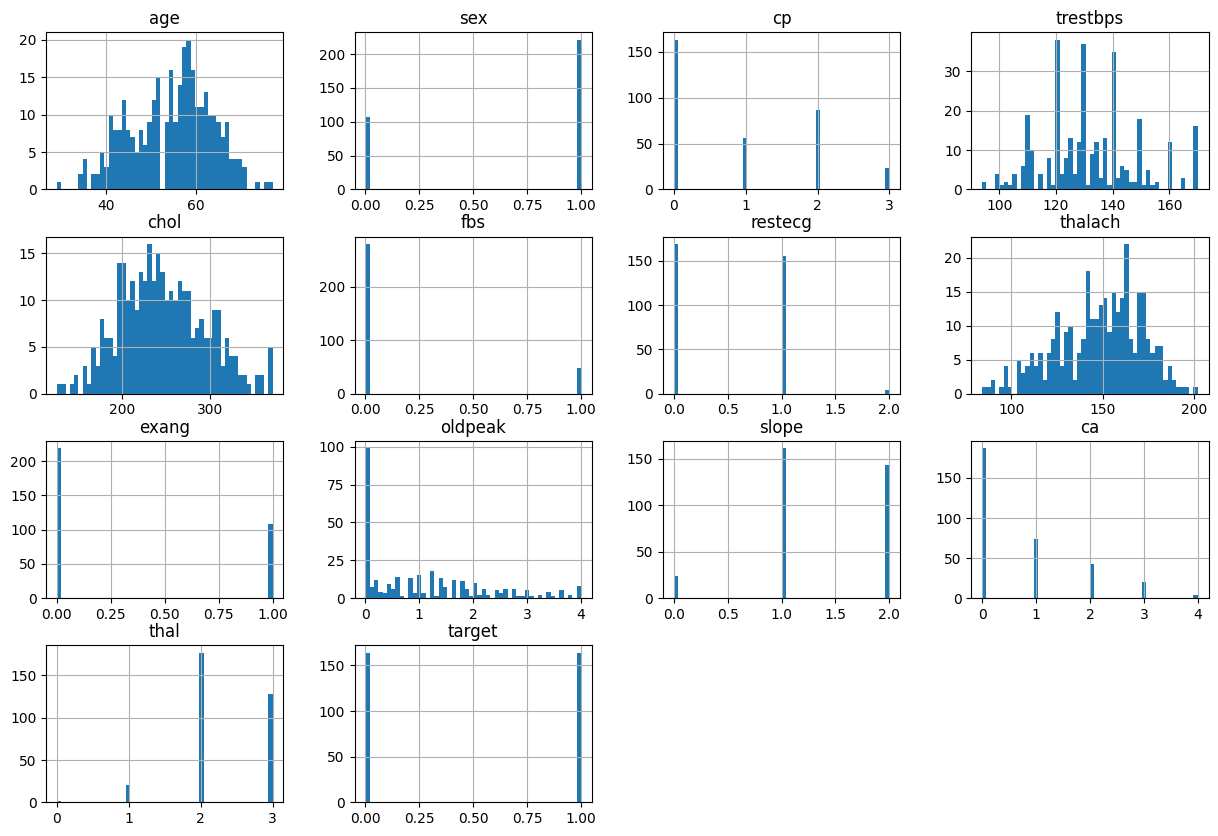

In [ ]:
df3.hist(bins=50,figsize=(15,10))

Feature target: 'target'

Deskripsi: Apakah pasien terindikasi adanya penyakit jantung atau tidak

Ini adalah variabel yang ingin model pembelajaran mesin saya prediksi berdasarkan variabel lainnya.



---
Nominal:

1. Sex: Jenis kelamin pasien.

*  Elaborasi: Jenis kelamin dapat mempengaruhi risiko penyakit kardiovaskular, dengan laki-laki cenderung memiliki risiko yang lebih tinggi daripada perempuan.

2. Fasting Blood Sugar: Kadar gula darah puasa pasien, dengan nilai yang menunjukkan apakah kadar gula darah melebihi 120 mg/dL atau tidak.

*  Elaborasi: Kadar gula darah puasa yang tinggi dapat menjadi faktor risiko untuk penyakit jantung dan diabetes.

3. Resting Electrocardiographic Results: Hasil elektrokardiografi pasien dalam keadaan istirahat, dengan nilai yang mewakili pola gelombang.
*  Elaborasi: Hasil elektrokardiografi dapat memberikan informasi tentang adanya gangguan irama jantung atau iskemia miokardium.

4. Exercise Induced Angina: Apakah pasien mengalami angina yang dipicu oleh latihan atau tidak.
*  Elaborasi: Angina yang dipicu oleh latihan adalah gejala yang mungkin terjadi pada penyakit jantung koroner.

5. Thal: Jenis cacat thalasemia yang dideteksi pada pasien.
*  Elaborasi: Cacat thalasemia dapat memengaruhi kapasitas pengangkutan oksigen darah dan dapat menjadi faktor risiko untuk penyakit jantung.


---
Ordinal:

1. Chest Pain Type: Jenis nyeri dada yang dirasakan oleh pasien, dengan nilai yang mewakili tingkat keparahan.
*  Elaborasi: Jenis nyeri dada dapat memberikan petunjuk tentang apakah pasien menderita angina atau gejala penyakit jantung lainnya.

2. Slope: Kemiringan segmen ST puncak latihan, dengan nilai yang mewakili pola perubahan.
*  Elaborasi: Kemiringan segmen ST dapat memberikan informasi tambahan tentang adanya iskemia miokardium pada pasien.

3. Number of Major Vessels: Jumlah pembuluh darah utama (0-3) yang diwarnai dengan flourosopi.
*  Elaborasi: Jumlah pembuluh darah utama yang terwarnai dapat memberikan informasi tentang tingkat keparahan penyakit koroner.


---
Numerical:

1. Age: Merupakan usia pasien dalam tahun.
*  Elaborasi: Usia pasien adalah faktor penting dalam diagnosis penyakit kardiovaskular karena risiko penyakit ini cenderung meningkat seiring bertambahnya usia.

2. Resting Blood Pressure: Tekanan darah pasien dalam keadaan istirahat (mmHg).
*  Elaborasi: Tekanan darah istirahat yang tinggi dapat menjadi indikator hipertensi, yang merupakan faktor risiko utama untuk penyakit jantung.

3. Serum Cholestoral: Kadar kolesterol serum pasien dalam mg/dL.
*  Elaborasi: Kolesterol serum yang tinggi dapat meningkatkan risiko aterosklerosis dan penyakit jantung koroner.

4. Maximum Heart Rate Achieved: Detak jantung maksimum yang dicapai oleh pasien selama ujian stres.
*  Elaborasi: Detak jantung maksimum yang tinggi biasanya dianggap sebagai indikator kebugaran kardiorespirasi yang baik.

5. Oldpeak: Depresi ST (mm) yang diinduksi oleh latihan relatif terhadap istirahat.
*  Elaborasi: Depresi ST yang signifikan dapat menjadi tanda iskemia miokardium, yang merupakan indikator penting dalam penilaian risiko penyakit jantung.


## Menjelaskan kondisi dan perbedaan penggunaan mean, median, dan modus

In [ ]:
# Menghitung mean untuk setiap fitur
mean_values = df3.mean()

# Menghitung median untuk setiap fitur
median_values = df3.median()

# Menghitung modus untuk setiap fitur
mode_values = df3.mode().iloc[0]  # Mengambil modus pertama jika ada lebih dari satu

# Menampilkan mean, median, dan modus untuk setiap fitur
print("\nMean untuk setiap fitur:")
display(mean_values)
print("\nMedian untuk setiap fitur:")
display(median_values)
print("\nModus untuk setiap fitur:")
display(mode_values)


Mean untuk setiap fitur:


age          54.539550
sex           0.673780
cp            0.905488
trestbps    131.995351
chol        246.071037
fbs           0.146341
restecg       0.496951
thalach     148.418352
exang         0.332317
oldpeak       1.084395
slope         1.362805
ca            0.719512
thal          2.314024
target        0.500000
dtype: float64


Median untuk setiap fitur:


age          56.0
sex           1.0
cp            1.0
trestbps    130.0
chol        242.5
fbs           0.0
restecg       0.0
thalach     152.0
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        0.5
dtype: float64


Modus untuk setiap fitur:


age          58.0
sex           1.0
cp            0.0
trestbps    120.0
chol        197.0
fbs           0.0
restecg       0.0
thalach     162.0
exang         0.0
oldpeak       0.0
slope         1.0
ca            0.0
thal          2.0
target        0.0
Name: 0, dtype: float64

Mean, median, dan modus adalah tiga metrik statistik yang berbeda yang digunakan untuk menganalisis distribusi data.

Mean (rata-rata) adalah jumlah semua nilai dibagi dengan jumlah total nilai. Berguna ketika data memiliki distribusi normal.

Median adalah nilai tengah dari data ketika data diurutkan dari terkecil ke terbesar. Berguna ketika data memiliki distribusi yang condong (skewed) atau ketika ada kehadiran outlier yang signifikan. Median lebih stabil terhadap outlier daripada rata-rata.

Modus adalah nilai yang paling sering muncul dalam kumpulan data. Berguna untuk data kategori atau nominal.

## Menemukan dan mendeskripsikan statistical five summaries

In [ ]:
five_summaries = df3.describe().transpose()[['min', '25%', '50%', '75%', 'max']]
five_summaries

,min,25%,50%,75%,max
age,29.000,48.0,56.0,61.00,77.000
sex,0.000,0.0,1.0,1.00,1.000
cp,0.000,0.0,1.0,2.00,3.000
trestbps,94.000,120.0,130.0,140.00,170.000
chol,126.000,211.0,242.5,277.25,370.375
fbs,0.000,0.0,0.0,0.00,1.000
restecg,0.000,0.0,0.0,1.00,2.000
thalach,84.125,132.0,152.0,165.00,202.000
exang,0.000,0.0,0.0,1.00,1.000
oldpeak,0.000,0.0,0.8,1.80,4.000


## Mendeskripsikan distribusi data

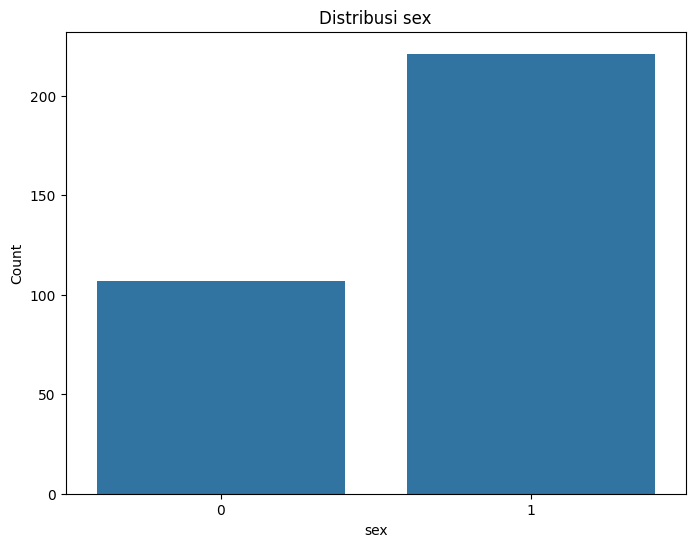

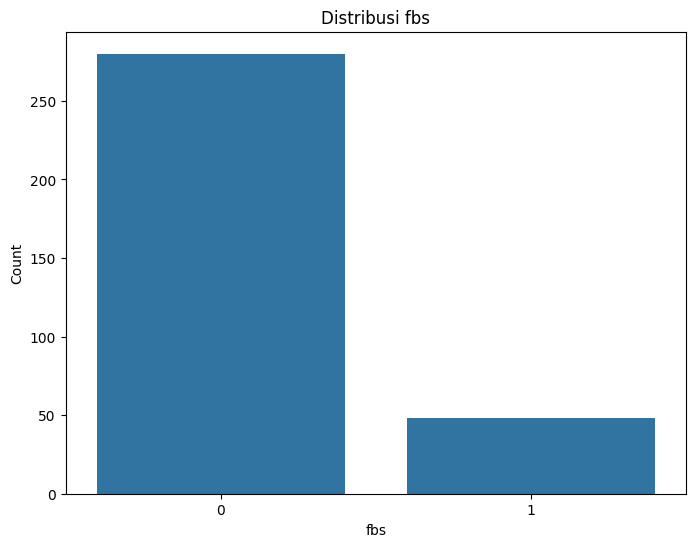

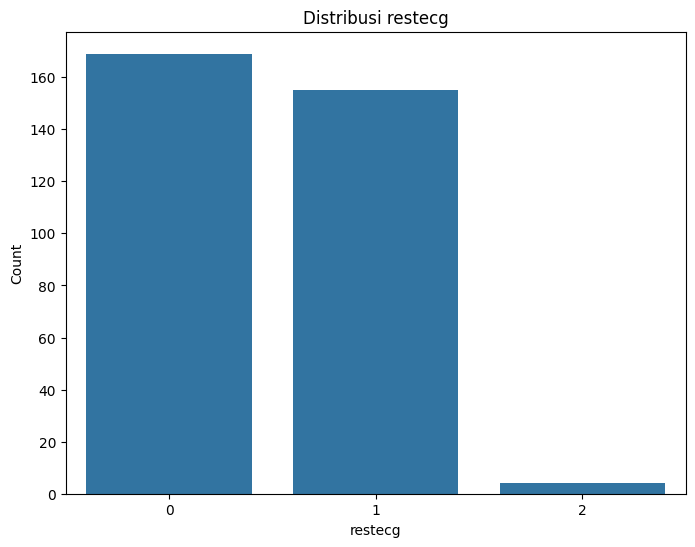

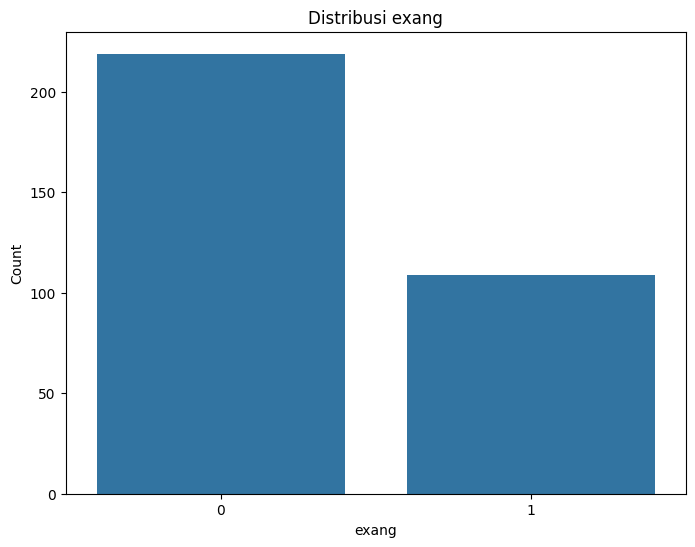

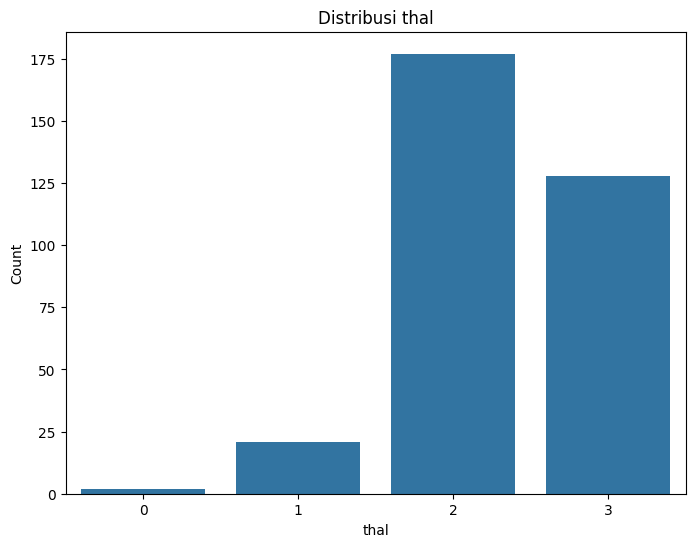

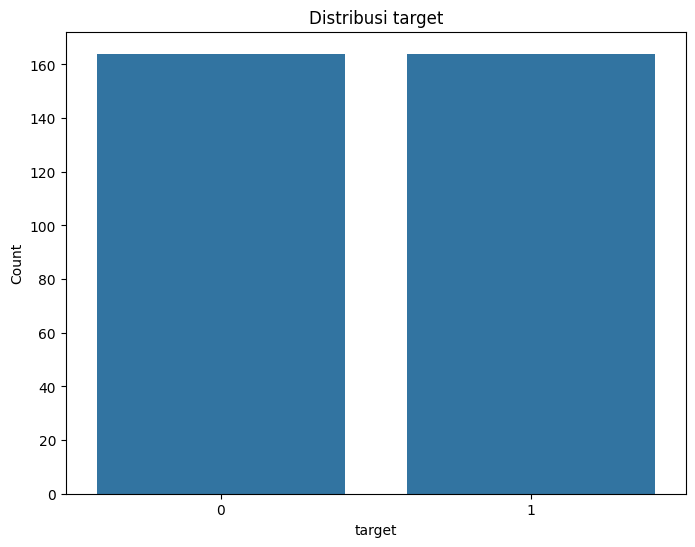

In [ ]:
# Nominal
# Daftar fitur nominal yang telah ditentukan
nominal_features = ['sex', 'fbs', 'restecg', 'exang', 'thal', 'target']

# Visualisasi distribusi dalam fitur-fitur nominal
for feature in nominal_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=df3)
    plt.title('Distribusi ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

Plot yang dihasilkan adalah diagram batang (bar plot) yang menunjukkan distribusi jumlah observasi untuk setiap kategori dalam setiap fitur nominal. Berikut adalah analisis yang bisa diambil dari hasil plot tersebut:

1. *Sex (Jenis Kelamin)*:
   - Plot menunjukkan distribusi jumlah pria dan wanita dalam dataset.
   - Dapat dilihat apakah dataset memiliki distribusi yang seimbang antara pria dan wanita atau tidak.
   - Analisis lebih lanjut dapat dilakukan untuk melihat apakah ada perbedaan signifikan antara pria dan wanita dalam hubungannya dengan target variabel atau variabel lain dalam dataset.

2. *Fbs (Fasting Blood Sugar)*:
   - Plot menunjukkan distribusi jumlah pasien dengan kadar gula darah puasa di atas atau di bawah 120 mg/dl.
   - Dapat dilihat apakah mayoritas pasien memiliki kadar gula darah puasa di atas atau di bawah 120 mg/dl.
   - Analisis lebih lanjut dapat dilakukan untuk melihat apakah kadar gula darah puasa mempengaruhi kondisi kesehatan pasien atau variabel target.

3. *Restecg (Resting Electrocardiographic Results)*:
   - Plot menunjukkan distribusi jumlah pasien berdasarkan hasil elektrokardiogram istirahat.
   - Dapat dilihat proporsi pasien dengan hasil elektrokardiogram normal, memiliki ST-T gelombang anomali, atau menunjukkan hipertrofi ventrikel kiri.
   - Analisis lebih lanjut dapat dilakukan untuk melihat apakah hasil elektrokardiogram istirahat memiliki hubungan dengan variabel target atau faktor risiko lainnya.

4. *Exang (Exercise Induced Angina)*:
   - Plot menunjukkan distribusi jumlah pasien yang mengalami angina yang diinduksi oleh latihan fisik.
   - Dapat dilihat apakah mayoritas pasien mengalami angina saat berlatih atau tidak.
   - Analisis lebih lanjut dapat dilakukan untuk melihat apakah angina yang diinduksi oleh latihan fisik merupakan faktor risiko atau memiliki hubungan dengan variabel target lainnya.

5. *Thal*:
   - Plot menunjukkan distribusi jumlah pasien berdasarkan jenis thalassemia yang mereka miliki.
   - Dapat dilihat proporsi pasien dengan jenis thalassemia normal, memiliki cacat tetap, atau memiliki cacat yang dapat dipulihkan.
   - Analisis lebih lanjut dapat dilakukan untuk melihat apakah jenis thalassemia memiliki hubungan dengan variabel target atau faktor risiko lainnya.

6. *Target*:
   - Plot menunjukkan distribusi jumlah pasien dengan atau tanpa penyakit jantung (1: ada, 0: tidak ada).
   - Dapat dilihat apakah dataset memiliki distribusi yang seimbang antara kategori target.
   - Analisis lebih lanjut dapat dilakukan untuk melihat faktor risiko atau variabel yang berkontribusi terhadap penyakit jantung berdasarkan distribusi target.

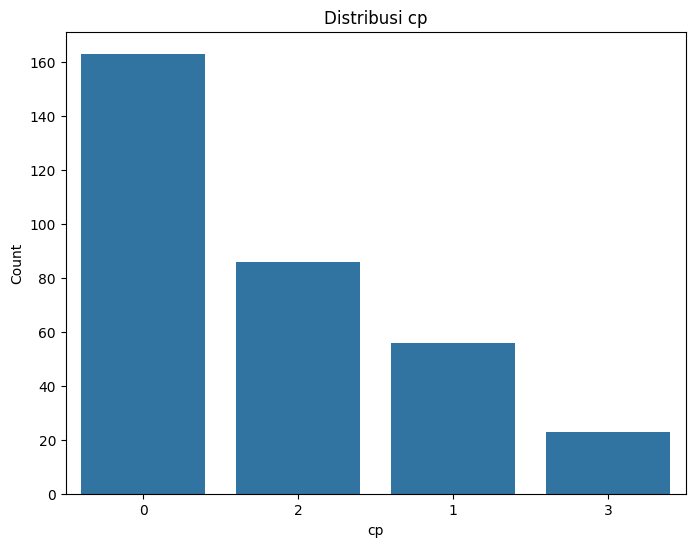

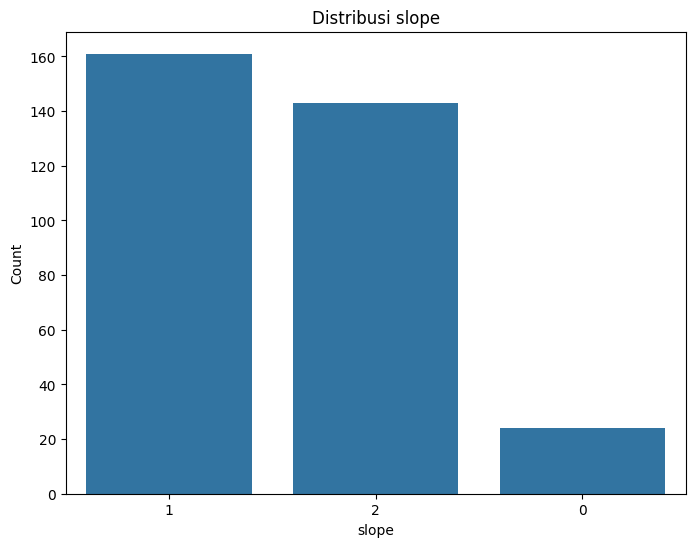

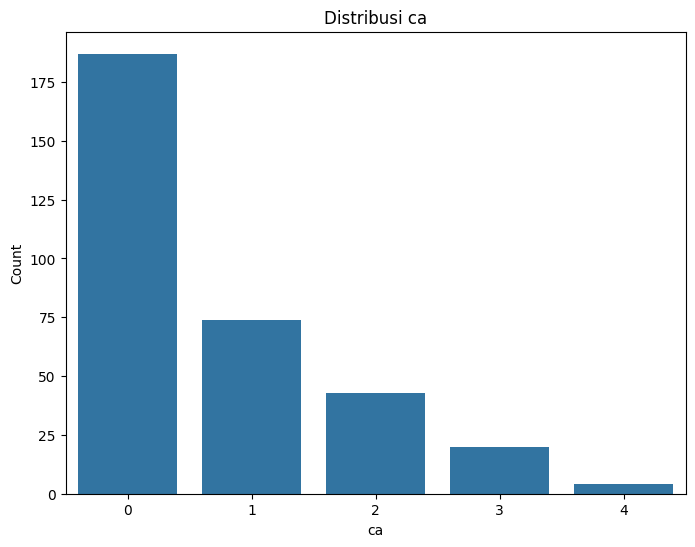

In [ ]:
# Ordinal
# Daftar fitur ordinal yang telah ditentukan
ordinal_features = ['cp', 'slope', 'ca']

# Visualisasi distribusi dalam fitur-fitur ordinal
for feature in ordinal_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=df3, order=df3[feature].value_counts().index)
    plt.title('Distribusi ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

Plot yang dihasilkan adalah diagram batang (bar plot) yang menunjukkan distribusi jumlah observasi untuk setiap kategori dalam setiap fitur ordinal. Berikut adalah analisis untuk masing-masing plot:

1. *Cp (Chest Pain Type)*:
   - Plot menunjukkan distribusi jumlah pasien berdasarkan jenis nyeri dada yang dialami.
   - Mayoritas pasien mengalami jenis nyeri dada tipe 0 (angina tidak ada) atau tipe 2 (nyeri dada non-anginal).
   - Proporsi pasien dengan jenis nyeri dada tipe 1 (nyeri dada tipe angina) dan tipe 3 (nyeri dada atipikal) lebih rendah.
   - Jenis nyeri dada mungkin menjadi faktor penting dalam mendiagnosis kondisi kesehatan pasien.

2. *Slope (Slope of the Peak Exercise ST Segment)*:
   - Plot menunjukkan distribusi jumlah pasien berdasarkan kemiringan segmen ST puncak latihan.
   - Mayoritas pasien memiliki kemiringan positif dari segmen ST puncak latihan.
   - Proporsi pasien dengan kemiringan datar atau negatif dari segmen ST puncak latihan lebih rendah.
   - Kemiringan segmen ST puncak latihan dapat memberikan informasi tambahan tentang kondisi jantung pasien.

3. *Ca (Number of Major Vessels Colored by Fluoroscopy)*:
   - Plot menunjukkan distribusi jumlah pasien berdasarkan jumlah pembuluh darah utama yang diwarnai oleh fluoroskopi.
   - Mayoritas pasien memiliki 0 pembuluh darah utama yang diwarnai, diikuti oleh 1 pembuluh darah utama yang diwarnai.
   - Proporsi pasien dengan 2 atau 3 pembuluh darah utama yang diwarnai lebih rendah.
   - Jumlah pembuluh darah utama yang diwarnai mungkin berkaitan dengan tingkat kerusakan atau penyumbatan pembuluh darah, yang dapat menjadi indikator kondisi jantung pasien.

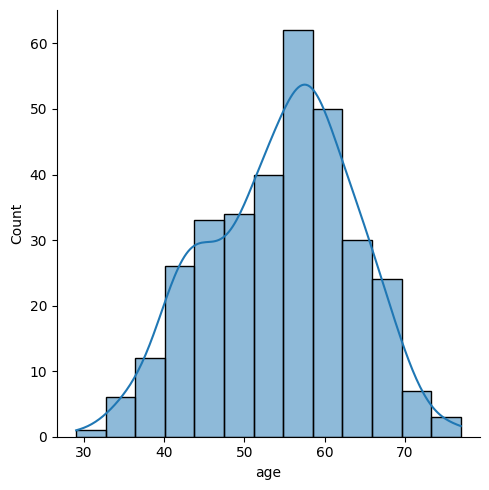

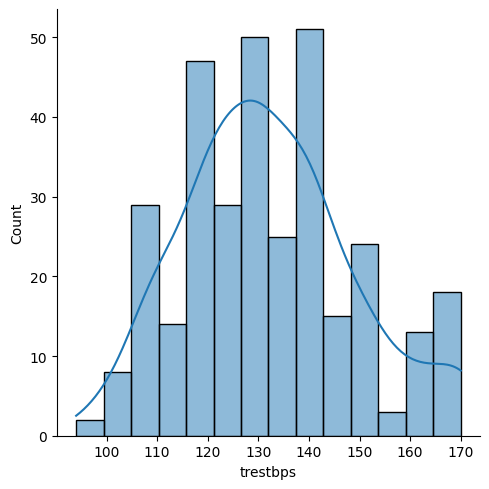

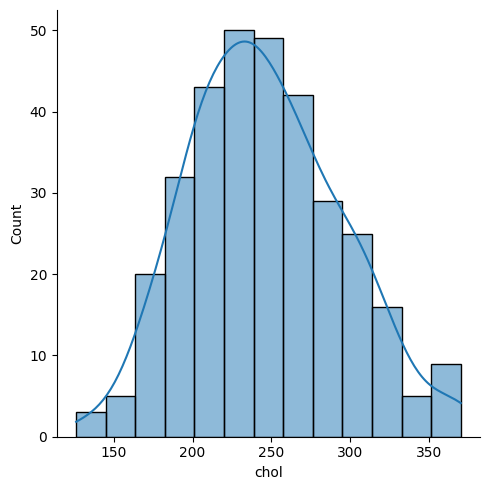

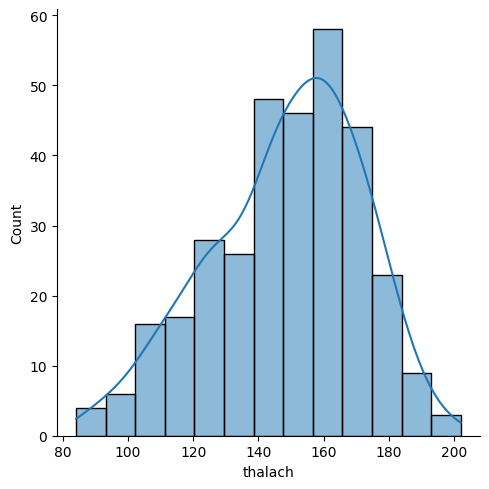

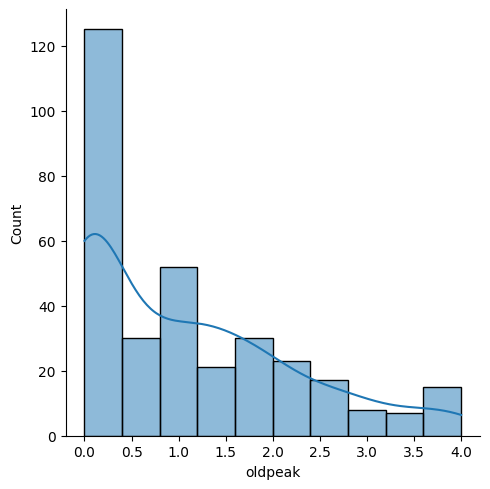

In [ ]:
# Numerikal
# Mendeskripsikan distribusi data
features_for_EDA = ["age", 'trestbps', 'chol', 'thalach', 'oldpeak']

# Visualisasi distribusi dalam fitur-fitur terpilih yang tidak termasuk nilai-nilai kategorikal
for feature in features_for_EDA[:]:
    sns.displot(df3[feature], kde=True)

Plot yang dihasilkan adalah histogram untuk setiap fitur numerik yang dipilih. Berikut adalah beberapa analisis yang bisa diambil dari hasil plot tersebut:

1. *Age (Usia)*:
   - Histogram menunjukkan distribusi frekuensi usia pasien.
   - Dapat dilihat apakah distribusi usia cenderung normal atau memiliki pola tertentu seperti skewness.
   - Analisis lebih lanjut dapat dilakukan untuk melihat hubungan antara usia dan kondisi kesehatan pasien.

2. *Trestbps (Tekanan Darah Istirahat)*:
   - Histogram menunjukkan distribusi frekuensi tekanan darah istirahat pasien.
   - Dapat dilihat apakah distribusi tekanan darah cenderung normal atau memiliki pola tertentu seperti skewness.
   - Analisis lebih lanjut dapat dilakukan untuk memahami hubungan antara tekanan darah istirahat dan kondisi kesehatan pasien.

3. *Chol (Kolesterol Serum)*:
   - Histogram menunjukkan distribusi frekuensi kolesterol serum pasien.
   - Dapat dilihat apakah distribusi kolesterol cenderung normal atau memiliki pola tertentu seperti skewness.
   - Analisis lebih lanjut dapat dilakukan untuk melihat hubungan antara kolesterol serum dan risiko penyakit jantung.

4. *Thalach (Detak Jantung Maksimal)*:
   - Histogram menunjukkan distribusi frekuensi detak jantung maksimal pasien.
   - Dapat dilihat apakah distribusi detak jantung cenderung normal atau memiliki pola tertentu seperti skewness.
   - Analisis lebih lanjut dapat dilakukan untuk memahami hubungan antara detak jantung maksimal dan kondisi kesehatan pasien.

5. *Oldpeak (Depresi ST yang Diinduksi oleh Latihan)*:
   - Histogram menunjukkan distribusi frekuensi depresi segmen ST yang diinduksi oleh latihan pasien.
   - Dapat dilihat apakah distribusi depresi ST cenderung normal atau memiliki pola tertentu seperti skewness.
   - Analisis lebih lanjut dapat dilakukan untuk melihat hubungan antara depresi ST dan risiko penyakit jantung.


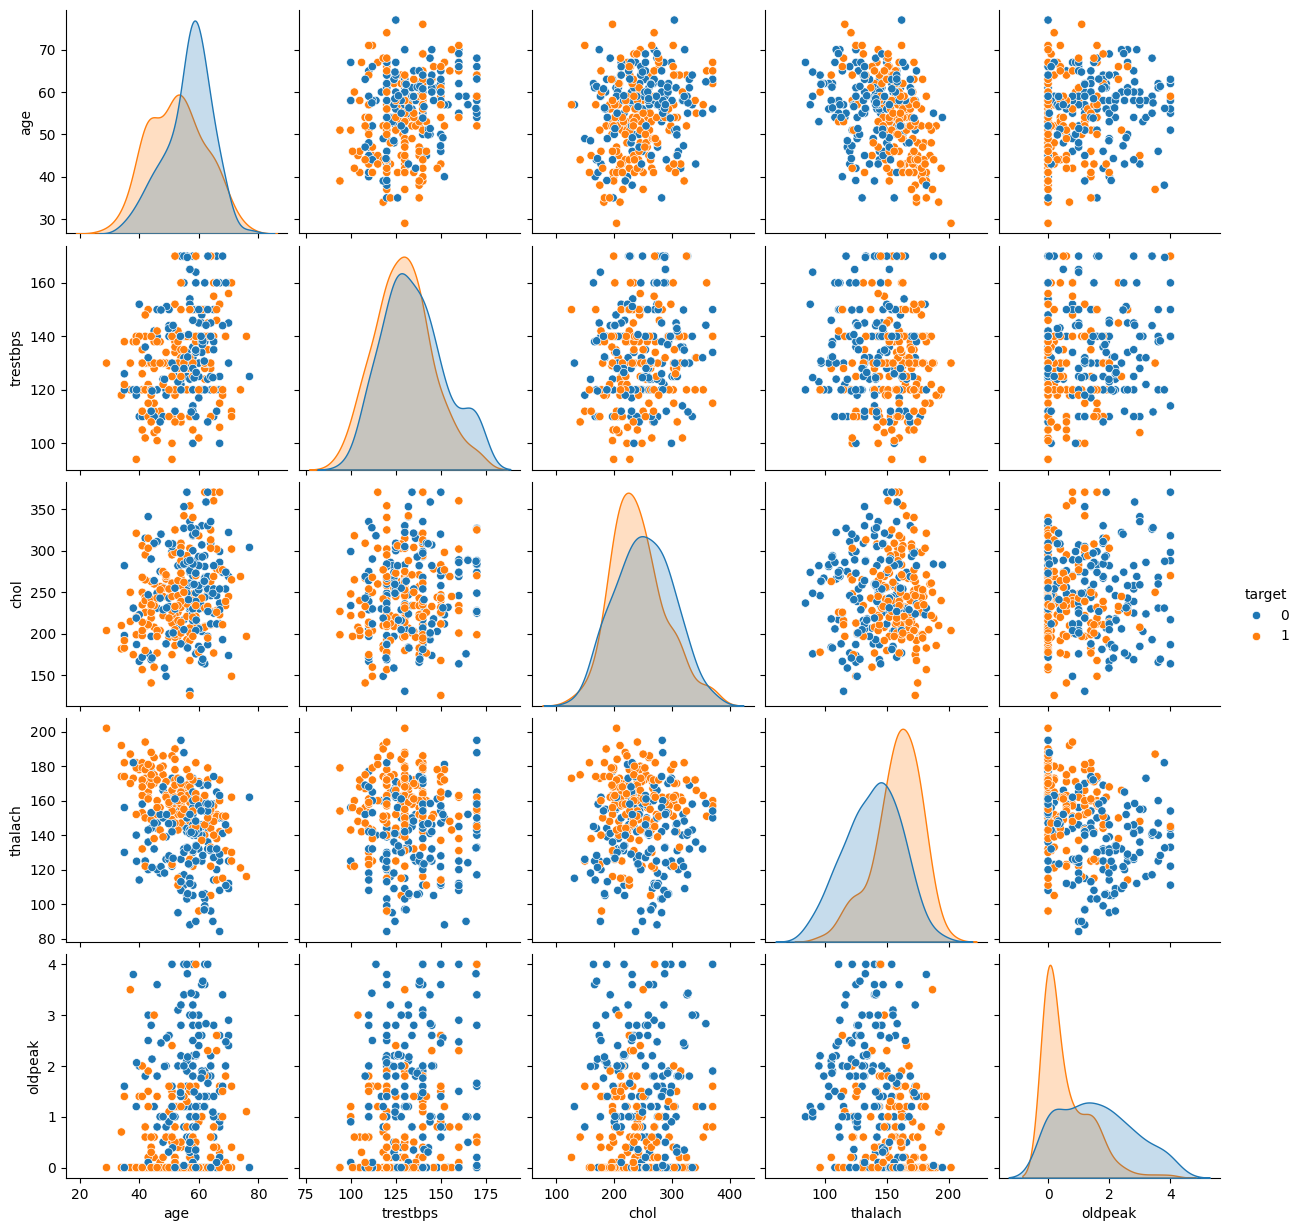

In [ ]:
# Visualisasi hubungan antara feature numerical dan target.
sns.pairplot(df3[['age','trestbps','chol','thalach','oldpeak','target']],hue='target')

Visualisasi pairplot digunakan untuk mengeksplorasi hubungan antara berbagai fitur dalam dataset, sambil memperhatikan target variabel (dalam kasus ini, 'target') jika ada. Berikut adalah beberapa analisis umum yang dapat diperoleh dari hasil pairplot:

1. *Distribusi Data*: Dari diagonal matriks pairplot, kita dapat melihat distribusi univariat dari setiap fitur. Distribusi ini dapat membantu kita memahami pola dan karakteristik dari setiap variabel. Misalnya, kita dapat melihat apakah distribusi fitur adalah normal atau memiliki skewness.

2. *Hubungan Antara Fitur*: Dari scatter plot di luar diagonal, kita dapat melihat hubungan antara pasangan fitur. Misalnya, kita dapat melihat apakah ada hubungan linear atau pola lainnya antara pasangan fitur tertentu. Jika hubungan antara dua fitur terlihat tidak linear, ini mungkin menyarankan adanya hubungan yang lebih kompleks.

3. *Pemisahan Kelas*: Jika hue='target' disertakan, kita dapat melihat bagaimana data terbagi berdasarkan variabel target. Misalnya, kita dapat melihat apakah ada pola atau tren yang membedakan antara dua kelas target (mungkin dengan warna yang berbeda pada pairplot).

4. *Korelasi*: Dari scatter plot di luar diagonal, kita juga dapat melihat apakah ada korelasi antara fitur-fitur tertentu. Korelasi yang kuat antara fitur-fitur tertentu dapat menjadi indikator penting dalam pemodelan.

5. *Outlier*: Pairplot juga dapat membantu dalam mengidentifikasi adanya outlier dalam data. Titik-titik yang berada jauh dari pola umum dapat menunjukkan adanya outlier yang perlu diperhatikan.


# Future Engineering

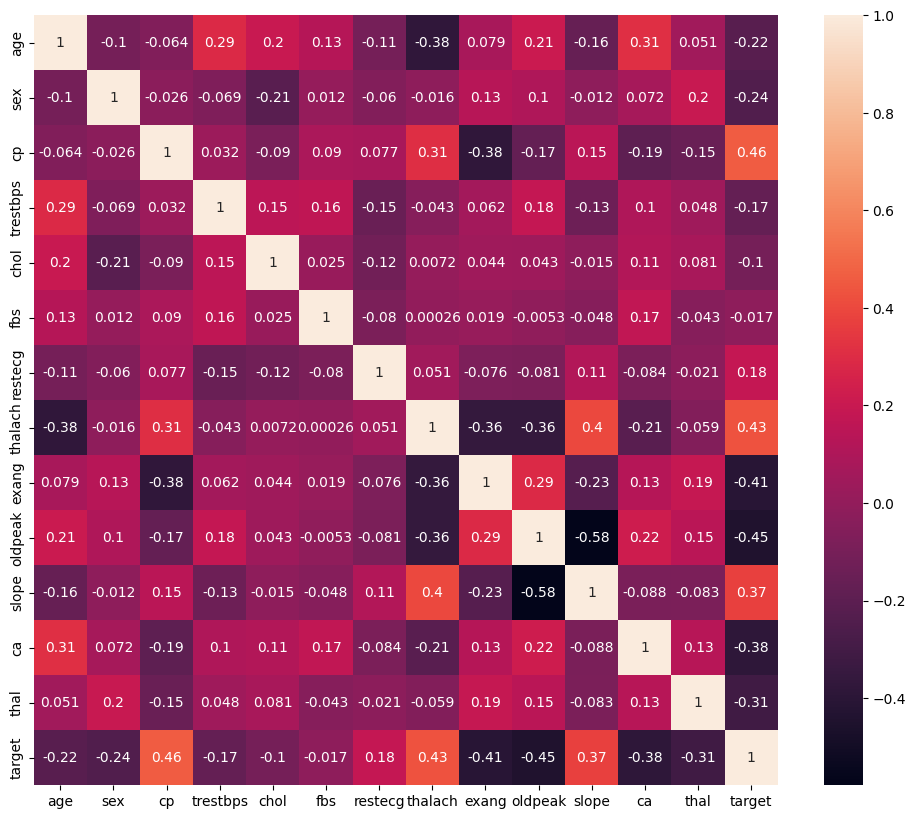

In [ ]:
# Menampilkan heatmap korelasi antar fitur
plt.figure(figsize=(12,10))
sns.heatmap(df3.corr(), annot=True)
plt.show()

## 1. Feature : Rasio Tekanan Darah

In [ ]:
# Menghitung rasio tekanan darah
df3['Blood Pressure Ratio'] = df3['trestbps'] / df3['oldpeak']

# Menampilkan beberapa baris pertama dari DataFrame dengan fitur baru
df3[['trestbps', 'oldpeak', 'Blood Pressure Ratio']].head()

,trestbps,oldpeak,Blood Pressure Ratio
0,125.0,1.0,125.000000
1,140.0,3.1,45.161290
2,145.0,2.6,55.769231
3,148.0,0.0,inf
4,138.0,1.9,72.631579


Insight:

memberikan gambaran tentang tekanan darah pasien dengan
mempertimbangkan tekanan darah istirahat (trestbps) dan oldpeak.

Potensi Korelasi dengan Risiko Penyakit Jantung: Rasio tekanan darah ini dapat memiliki korelasi dengan risiko penyakit jantung. Misalnya, nilai yang tinggi dari fitur ini mungkin menandakan respons jantung yang tidak sehat terhadap tekanan darah, yang dapat mengindikasikan risiko yang lebih tinggi terhadap penyakit jantung.

Fitur ini dapat digunakan sebagai fitur prediktif dalam pemodelan untuk memprediksi risiko penyakit jantung sehingga mampu meningkatkan kinerja model dalam memprediksi kasus penyakit jantung.

## 2. Feature: Rasio Kolesterol Total terhadap HDL

In [ ]:
# Menghitung rasio kolesterol total terhadap HDL
df3['Cholesterol HDL Ratio'] = df3['chol'] / df3['thalach']

# Menampilkan beberapa baris pertama dari DataFrame dengan fitur baru
df3[['chol', 'thalach', 'Cholesterol HDL Ratio']].head()

,chol,thalach,Cholesterol HDL Ratio
0,212.0,168.0,1.261905
1,203.0,155.0,1.309677
2,174.0,125.0,1.392000
3,203.0,161.0,1.260870
4,294.0,106.0,2.773585


Insight:

Fitur baru ini memberikan gambaran tentang kesehatan lipid seseorang dengan mempertimbangkan rasio antara kolesterol total (yang merupakan faktor risiko untuk penyakit jantung) dan HDL (yang memiliki efek protektif terhadap penyakit jantung). Rasio ini dapat memberikan informasi tambahan tentang profil lipid seseorang dengan memantau kesehatan jantung seseorang. Memantau perubahan dalam rasio kolesterol total terhadap HDL dari waktu ke waktu dapat membantu dalam mengidentifikasi risiko penyakit jantung yang mungkin berkembang.

Fitur ini juga menyoroti pentingnya kadar HDL yang tinggi dalam melindungi kesehatan jantung. Nilai yang tinggi dari fitur ini mungkin menunjukkan ketidakseimbangan dalam profil lipid dan meningkatkan risiko terkena penyakit jantung. Ini bisa menjadi aspek penting dalam penilaian risiko penyakit jantung.

Dengan demikian, fitur ini dapat digunakan sebagai fitur prediktif dalam pemodelan untuk memprediksi risiko penyakit jantung sehingga mungkin dapat meningkatkan kinerja model dalam memprediksi kasus penyakit jantung.

## 3. Feature: Aktivitas Fisik

In [ ]:
# Menggabungkan variabel yang mencerminkan aktivitas fisik
df3['Physical Activity'] = df3['exang'] + df3['slope'] + df3['thalach']

# Menampilkan beberapa baris pertama dari DataFrame dengan fitur baru
df3[['exang', 'slope', 'thalach', 'Physical Activity']].head()

,exang,slope,thalach,Physical Activity
0,0,2,168.0,170.0
1,1,0,155.0,156.0
2,1,0,125.0,126.0
3,0,2,161.0,163.0
4,0,1,106.0,107.0


Insight:

Fitur baru ini memberikan gambaran tentang tingkat aktivitas fisik seseorang berdasarkan kombinasi dari beberapa variabel yang relevan dalam dataset. Hal ini dapat membantu dalam memahami seberapa aktif seseorang dalam kehidupan sehari-hari mereka.

Aktivitas fisik yang cukup merupakan faktor penting dalam pencegahan penyakit jantung dengan memberikan indikasi tentang seberapa sering seseorang terlibat dalam aktivitas fisik yang dapat membantu mengurangi risiko penyakit jantung.

Dengan demikian, melihat dari tingkat aktivitas fisik seseorang dapat menjadi faktor penting dalam memprediksi risiko penyakit jantung. Fitur ini dapat digunakan sebagai salah satu variabel prediktif dalam model untuk memprediksi kemungkinan seseorang terkena penyakit jantung.



## 4. Feature: Resiko Jumlah Pembuluh Darah Berwarna Fluoroscopy terhadap Pernyakit Jantung

In [ ]:
# Menghitung fitur baru
df3['Vessel Age Product'] = df3['ca'] * df3['age']

# Menampilkan beberapa baris pertama dari DataFrame dengan fitur baru
df3[['ca', 'age', 'Vessel Age Product']].head()

,ca,age,Vessel Age Product
0,2,52.0,104.0
1,0,53.0,0.0
2,0,70.0,0.0
3,1,61.0,61.0
4,3,62.0,186.0


Insight:

Dengan fitur baru ini mampu memperoleh indikasi tentang seberapa besar risiko individu terhadap penyakit jantung berdasarkan jumlah pembuluh darah yang terwarnai dan faktor usia. Semakin tinggi produk dari jumlah pembuluh darah berwarna fluoroscopy dan usia seseorang, semakin besar risiko individu tersebut terkena penyakit jantung.

Perhatian khusus untuk deteksi dini dan pencegahan penyakit jantung, karena risiko penyakit jantung cenderung meningkat seiring bertambahnya usia. Dengan memperhatikan jumlah pembuluh darah berwarna fluoroscopy, yang mungkin merupakan tanda-tanda penyakit jantung, kita dapat meningkatkan kesadaran akan risiko tersebut serta dapat membantu dalam mengidentifikasi kelompok risiko tinggi yang memerlukan perhatian lebih dalam pencegahan dan pengelolaan penyakit jantung.

## 5. Feature: Indikasi Keparahan Penyakit Jantung

In [ ]:
# Menghitung fitur baru
df3['Chest Pain x ST Slope'] = df3['cp'] * df3['slope']

# Menampilkan beberapa baris pertama dari DataFrame dengan fitur baru
df3[['cp', 'slope', 'Chest Pain x ST Slope']].head(20)

,cp,slope,Chest Pain x ST Slope
0,0,2,0
1,0,0,0
2,0,0,0
3,0,2,0
4,0,1,0
5,0,1,0
6,0,0,0
7,0,1,0
8,0,2,0
9,0,1,0


Insight:

Fitur baru ini memberikan gambaran tentang kemungkinan hubungan antara jenis nyeri dada yang dialami oleh pasien dan kemiringan puncak latihan ST dalam elektrokardiogram mereka dan dapat memberikan informasi tambahan tentang kondisi kardiovaskular pasien.

Kombinasi antara jenis nyeri dada dan kemiringan puncak latihan ST dapat memberikan indikasi tentang keparahan atau tipe spesifik dari penyakit jantung yang mungkin dialami oleh pasien.

Dengan demikian, fitur baru ini dapat digunakan sebagai salah satu fitur prediktif dalam pemodelan untuk memprediksi risiko penyakit jantung lebih akurat.

## 6. Feature: Rasio Detak Jantung Maksimum terhadap Tekanan Darah

In [ ]:
# Menghitung rasio Detak Jantung Maksimum terhadap Tekanan Darah
df3['rasio'] = df3['thalach'] / df3['trestbps']

# Menampilkan DataFrame dengan fitur baru
df3[['thalach','trestbps','rasio']].head()

,thalach,trestbps,rasio
0,168.0,125.0,1.344000
1,155.0,140.0,1.107143
2,125.0,145.0,0.862069
3,161.0,148.0,1.087838
4,106.0,138.0,0.768116


Insight:

Dengan adanya fitur "Rasio Detak Jantung Maksimum terhadap Tekanan Darah", dapat memberikan gambaran tentang kesehatan jantung secara keseluruhan serta untuk membantu dalam memantau perubahan rasio ini dari waktu ke waktu. Semakin tinggi rasio tersebut, semakin efisien jantung dalam memompa darah relatif terhadap tekanan darah basal. Ini bisa menandakan kebugaran kardiovaskular yang lebih baik.

Rasio yang signifikan di atas atau di bawah nilai rata-rata dapat menunjukkan adanya penyimpangan dari kondisi normal. Rasio yang terlalu rendah mungkin menandakan masalah dengan kontraksi jantung atau tekanan darah yang rendah, sementara rasio yang terlalu tinggi mungkin menunjukkan hipertensi atau stres pada jantung.

Selain itu, rasio ini dapat membantu dalam menilai risiko terhadap penyakit jantung. Pada umumnya, rasio yang lebih rendah dapat menunjukkan risiko penyakit jantung yang lebih tinggi karena jantung harus bekerja lebih keras untuk memompa darah. Sebaliknya, rasio yang lebih tinggi dapat menandakan risiko yang lebih rendah.

Dengan demikian, adanya fitur ini dapat merencanakan langkah-langkah preventif yang lebih efektif untuk mengurangi dampak dari penyakit jantung, serta memantau kesehatan jantung secara keseluruhan.

## 7. Feature: Risiko Komplikasi dari Diabetes dan Tekanan Darah Tinggi

In [ ]:
# Ambil kolom Gula Darah Puasa (Fasting Blood Sugar) dan Oldpeak
gula_darah_puasa = df3['fbs']
oldpeak = df3['oldpeak']

# Hitung hasil perkalian antara gula darah puasa dan oldpeak
fitur_baru = gula_darah_puasa * oldpeak

# Tambahkan fitur baru ke dalam dataframe
df3['gula_darah_puasa_oldpeak'] = fitur_baru

# Melihat 5 data teratas setelah penambahan fitur baru
df3[['fbs','oldpeak','gula_darah_puasa_oldpeak']].head()

,fbs,oldpeak,gula_darah_puasa_oldpeak
0,0,1.0,0.0
1,1,3.1,3.1
2,0,2.6,0.0
3,0,0.0,0.0
4,1,1.9,1.9


Insight:

Fitur baru yang dihasilkan dari perkalian antara gula darah puasa dan oldpeak dapat mencerminkan interaksi antara dua faktor risiko utama, yaitu tingkat gula darah puasa yang tinggi dan tingkat depresi ST yang tinggi. Insight yang dapat diperoleh adalah seberapa besar pengaruh tingkat gula darah terhadap tingkat depresi ST dan sebaliknya.

Selain itu, fitur ini dapat mengindikasikan tingkat keparahan iskemia jantung berdasarkan kombinasi antara tingkat gula darah dan tingkat depresi ST. Semakin tinggi nilai fitur tersebut, semakin tinggi kemungkinan terjadinya iskemia yang signifikan.

Dengan demikian, fitur ini dapat digunakan sebagai salah satu prediktor dalam model untuk memprediksi risiko penyakit jantung sehingga mampu menentukan risiko seseorang terkena penyakit jantung.

Analisis terhadap fitur ini dapat membantu dalam mengevaluasi efektivitas langkah-langkah preventif dalam mengurangi risiko penyakit jantung. Misalnya, apakah penurunan tingkat gula darah berhasil mengurangi tingkat depresi ST dan akhirnya mengurangi risiko penyakit jantung.


## 8. Feature: Interaksi antara Usia dan Kekuatan Jantung

In [ ]:
# Membuat fitur baru Usia x Detak Jantung Maksimum
df3['Usia Detak Jantung'] = df3['age'] * df3['thalach']

# Melihat DataFrame dengan fitur baru
df3[['age','thalach','Usia Detak Jantung']].head()

,age,thalach,Usia Detak Jantung
0,52.0,168.0,8736.0
1,53.0,155.0,8215.0
2,70.0,125.0,8750.0
3,61.0,161.0,9821.0
4,62.0,106.0,6572.0


Insight:

Dari fitur baru ini dapat mencerminkan bagaimana detak jantung maksimum seseorang berkembang seiring bertambahnya usia. Dengan mengalikan usia dengan detak jantung maksimum, kita dapat melihat sejauh mana detak jantung maksimum mungkin menurun seiring bertambahnya usia.

Nilai fitur ini yang lebih tinggi dapat menunjukkan adanya potensi risiko jantung yang lebih besar. Misalnya, nilai yang tinggi mungkin menandakan bahwa seseorang dengan usia yang lebih tua memiliki detak jantung maksimum yang lebih rendah, yang dapat menjadi indikator adanya masalah kesehatan jantung.

Selain itu, fitur ini mencerminkan interaksi antara usia dan kekuatan jantung. Nilai yang tinggi mungkin menunjukkan bahwa seseorang dengan usia yang lebih tua masih mempertahankan detak jantung maksimum yang tinggi, yang dapat mengindikasikan tingkat kebugaran jantung yang baik.

Dengan demikian, fitur ini dapat membantu dalam merancang rencana pencegahan yang lebih personal dan efektif dengan model prediksi.


## 9. Feature: Risiko Penyumbatan Pembuluh Darah Relatif terhadap Kekuatan Jantung

In [ ]:
# Menghitung Rasio Kolesterol terhadap Detak Jantung Maksimum
df3['Ratio Chol MaxHR'] = df3['chol'] / df3['thalach']

# Menghitung Rasio Tekanan Darah terhadap Detak Jantung Maksimum
df3['Ratio BP MaxHR'] = df3['trestbps'] / df3['thalach']

# Menggabungkan Kedua Rasio
df3['Ratio BP Chol MaxHR'] = df3['Ratio BP MaxHR'] * df3['Ratio Chol MaxHR']

# Normalisasi atau Standarisasi Fitur (opsional)
df3['Ratio BP Chol MaxHR'] = (df3['Ratio BP Chol MaxHR'] - df3['Ratio BP Chol MaxHR'].mean()) / df3['Ratio BP Chol MaxHR'].std()

# Tampilkan DataFrame yang telah diubah
df3[['chol','trestbps','thalach','Ratio Chol MaxHR','Ratio BP MaxHR','Ratio BP Chol MaxHR']].head()

,chol,trestbps,thalach,Ratio Chol MaxHR,Ratio BP MaxHR,Ratio BP Chol MaxHR
0,212.0,125.0,168.0,1.261905,0.744048,-0.898393
1,203.0,140.0,155.0,1.309677,0.903226,-0.573402
2,174.0,145.0,125.0,1.392000,1.160000,0.001667
3,203.0,148.0,161.0,1.260870,0.919255,-0.605198
4,294.0,138.0,106.0,2.773585,1.301887,2.660248


Insight:

Rasio kolesterol terhadap detak jantung maksimum dapat memberikan pemahaman tentang seberapa besar beban yang harus ditanggung oleh jantung untuk mengatasi kadar kolesterol dalam darah. Rasio yang lebih tinggi mungkin mengindikasikan risiko yang lebih tinggi untuk pembuluh darah tersumbat.

Selain itu, fitur ini mampu mencerminkan seberapa keras jantung harus bekerja untuk mengatasi tekanan darah. Rasio yang lebih tinggi dapat menandakan bahwa jantung harus bekerja lebih keras, yang mungkin meningkatkan risiko penyumbatan pembuluh darah.

Pada umumnya, nilai-nilai yang tinggi dari fitur-fitur ini dapat menjadi indikator potensial adanya penyimpangan dari kondisi normal, seperti hiperlipidemia atau tekanan darah tinggi, yang merupakan faktor risiko utama untuk penyakit jantung sehingga penting untuk mengidentifikasi individu yang berisiko tinggi untuk penyakit jantung dan merancang intervensi atau langkah-langkah preventif yang sesuai untuk mengurangi risiko dan dampak dari penyakit jantung.

## 10. Feature: Rasio Kolesterol terhadap Umur

In [ ]:
# Membuat fitur rasio baru
df3['rasio'] = df3['chol'] / df3['age']

# Menampilkan DataFrame yang telah diperbarui
df3[['chol','age','rasio']].head()

,chol,age,rasio
0,212.0,52.0,4.076923
1,203.0,53.0,3.830189
2,174.0,70.0,2.485714
3,203.0,61.0,3.327869
4,294.0,62.0,4.741935


Insight:

Rasio kolesterol terhadap usia berkembang seiring bertambahnya usia. Ini dapat memberikan pemahaman tentang bagaimana kadar kolesterol serum cenderung berubah seiring dengan proses penuaan.

Rasio ini dapat berfungsi sebagai indikator potensial risiko penyakit jantung. Semakin tinggi rasio kolesterol terhadap usia, semakin tinggi risiko terhadap penyakit jantung, karena kolesterol yang tinggi dapat menyebabkan penyumbatan arteri, yang merupakan faktor risiko utama penyakit jantung.

Insight ini dapat menggarisbawahi pentingnya pengawasan kadar kolesterol serum terutama pada populasi yang lebih tua, karena risiko penyakit jantung cenderung meningkat seiring bertambahnya usia.

Dengan memahami insight dari fitur ini, kita dapat menggunakannya sebagai panduan untuk mengembangkan strategi pencegahan penyakit jantung yang lebih efektif, seperti mengendalikan kadar kolesterol melalui pola makan sehat, olahraga teratur, dan pengelolaan stres.